In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

from imblearn.over_sampling import SMOTE

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("creditcard.csv")

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [6]:
df.shape

(284807, 31)

In [7]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'class'],
      dtype='object')

In [8]:
df.duplicated().sum()

1081

In [9]:
df = df.drop_duplicates()

In [10]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
class     0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  V19     283726 non-null  float64
 20  V20     283726 non-null  float64
 21  V21     28

In [12]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


In [13]:
df.nunique()

Time      124592
V1        275653
V2        275655
V3        275657
V4        275654
V5        275657
V6        275652
V7        275651
V8        275643
V9        275656
V10       275646
V11       275648
V12       275654
V13       275657
V14       275653
V15       275653
V16       275645
V17       275646
V18       275655
V19       275645
V20       275632
V21       275617
V22       275644
V23       275611
V24       275645
V25       275640
V26       275647
V27       275597
V28       275558
Amount     32767
class          2
dtype: int64

In [14]:
#Rename Class
df.rename(columns={"class": "is_fraudulent_tx"}, inplace=True)

#Percentage of fraud
fraudulent_percentage = df[df.is_fraudulent_tx == 1].is_fraudulent_tx.count() / df.is_fraudulent_tx.count()
print(fraudulent_percentage)

0.001667101358352777


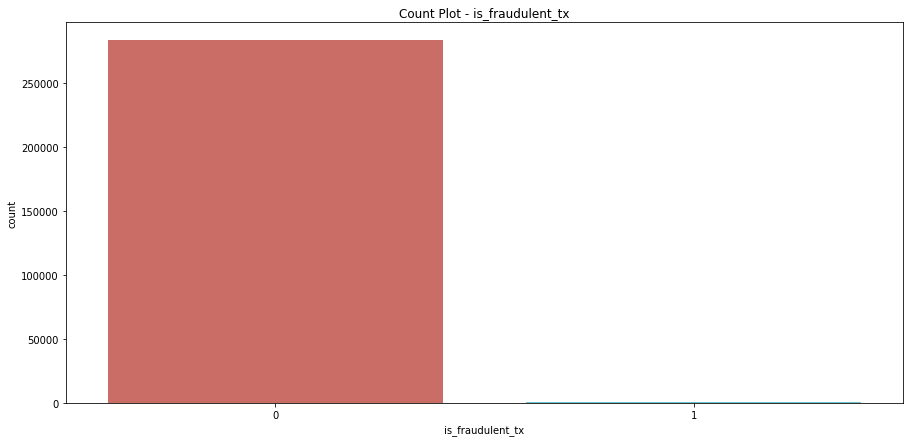

In [17]:
plt.figure(figsize=[15,7],)
plt.title('Count Plot - is_fraudulent_tx')
sns.countplot(x = 'is_fraudulent_tx', data = df, palette = 'hls')
plt.show()

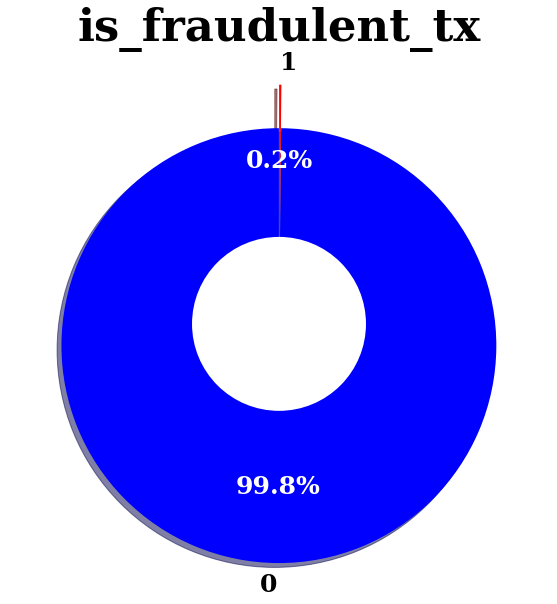

In [20]:
data = df['is_fraudulent_tx'].value_counts()

explode = (0.1, 0.1)
plt.figure(figsize=(14, 10))
patches, texts, pcts = plt.pie(data,
                               labels=data.index,
                               colors= ['blue', 'red'],
                               pctdistance=0.65,
                               shadow=True,
                               startangle=90,
                               explode = (0.1, 0.1),
                               autopct='%1.1f%%',
                               textprops={ 'fontsize': 25,
                                           'color': 'black',
                                           'weight': 'bold',
                                           'family': 'serif' })
plt.setp(pcts, color='white')

hfont = {'fontname':'serif', 'weight': 'bold'}
plt.title('is_fraudulent_tx', size=45, **hfont)

centre_circle = plt.Circle((0,0),0.40,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

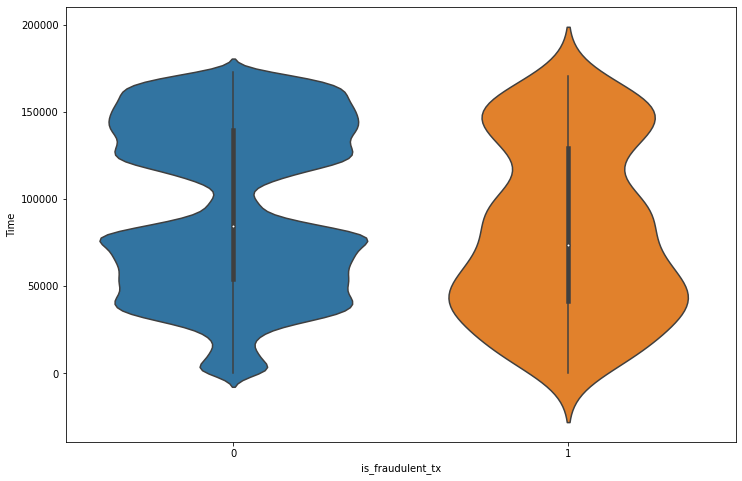

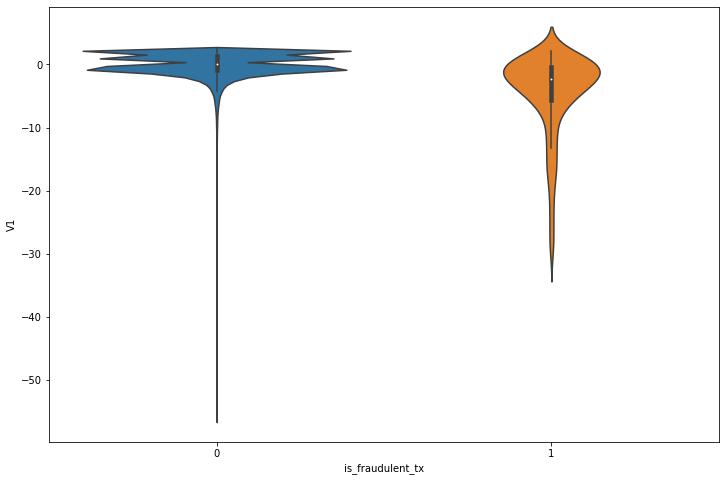

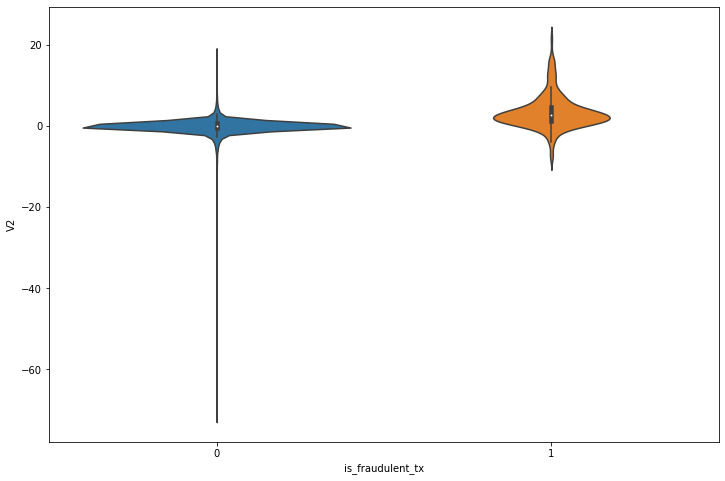

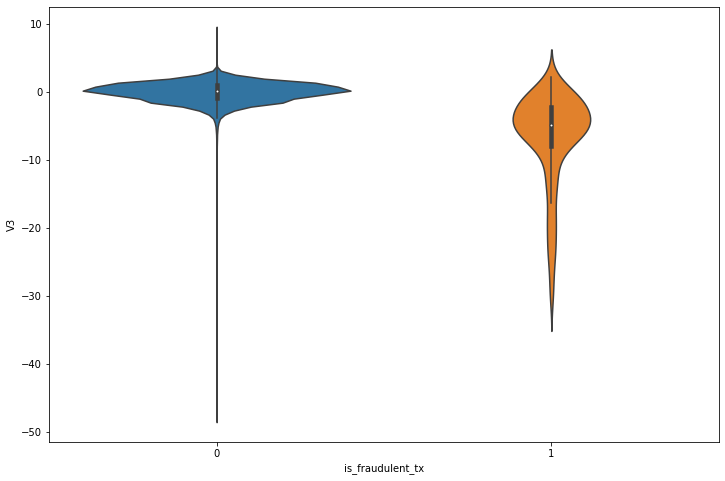

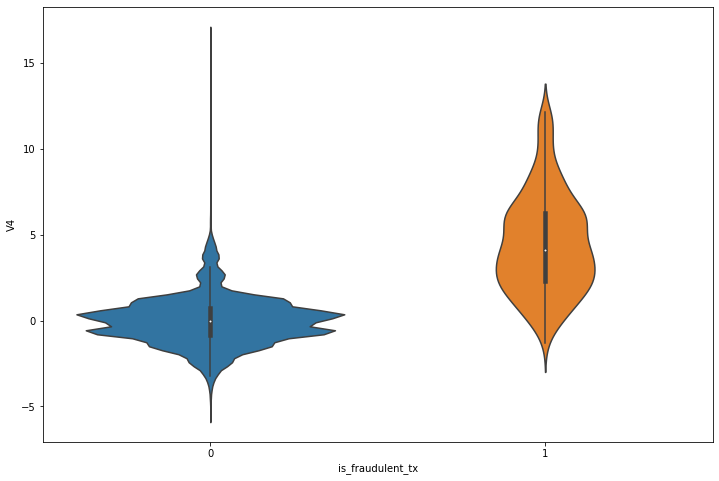

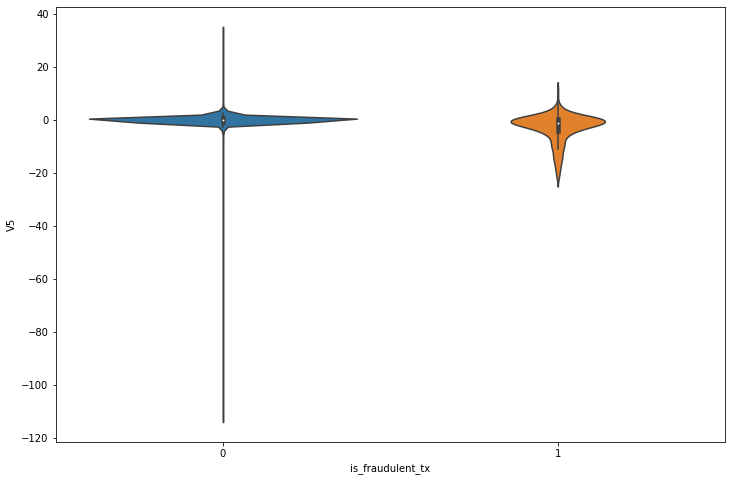

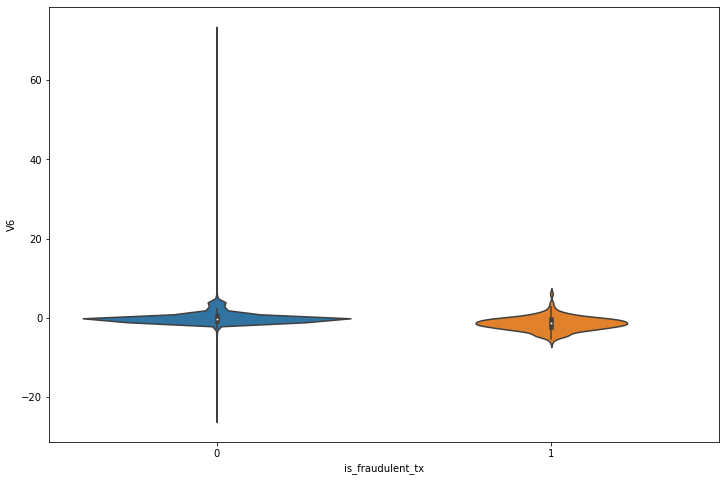

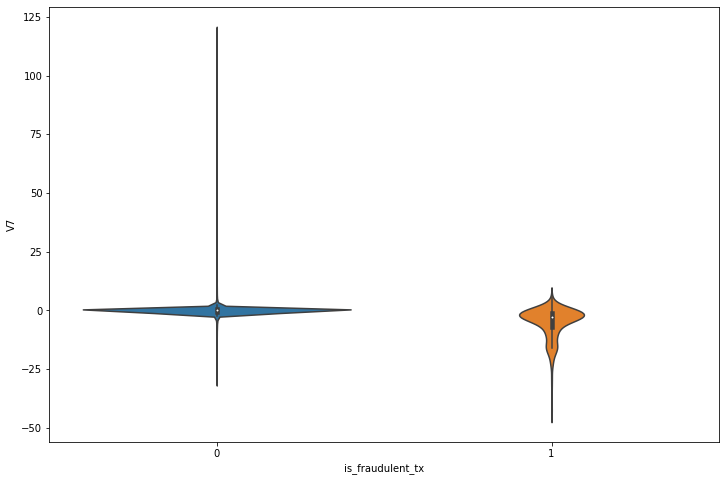

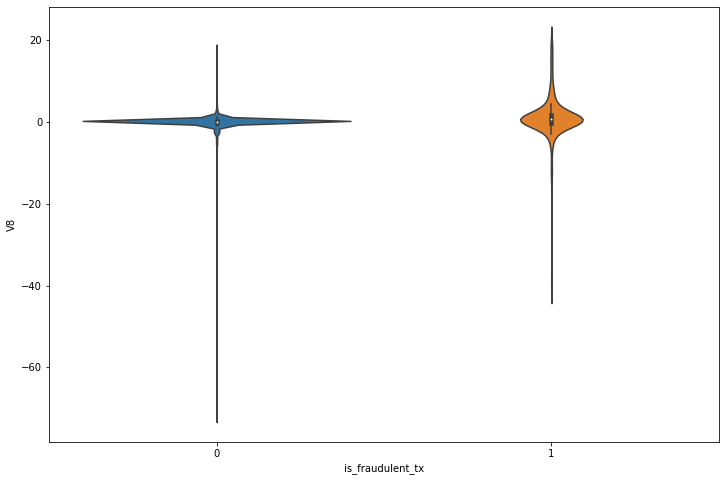

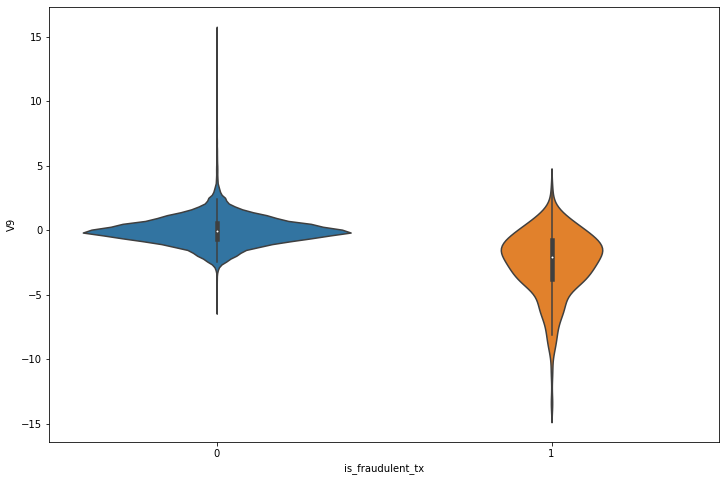

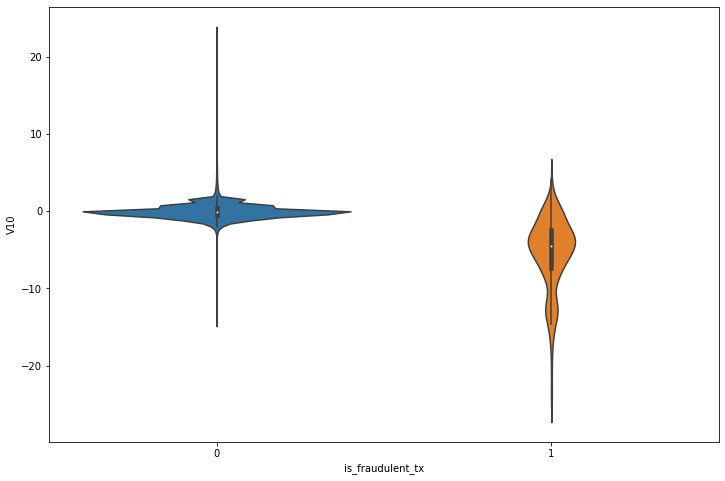

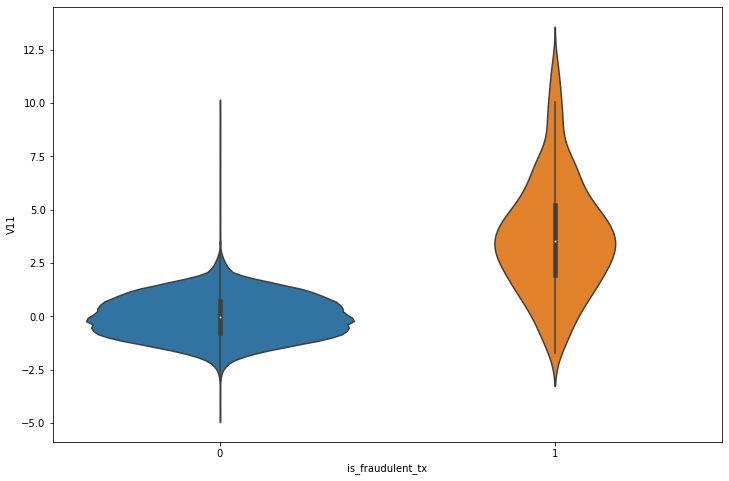

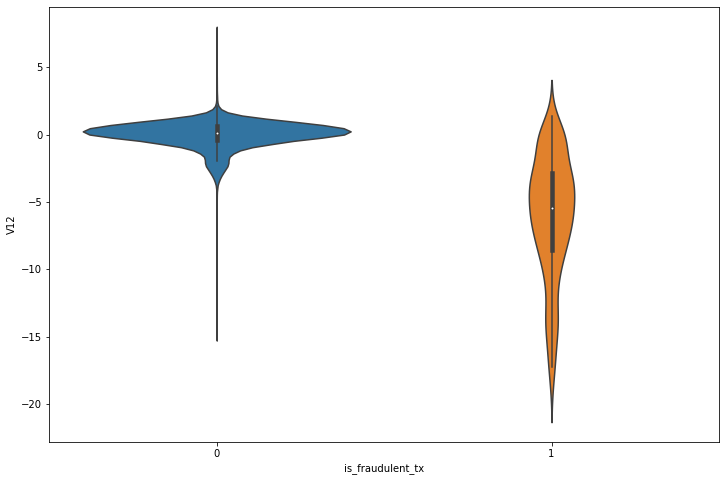

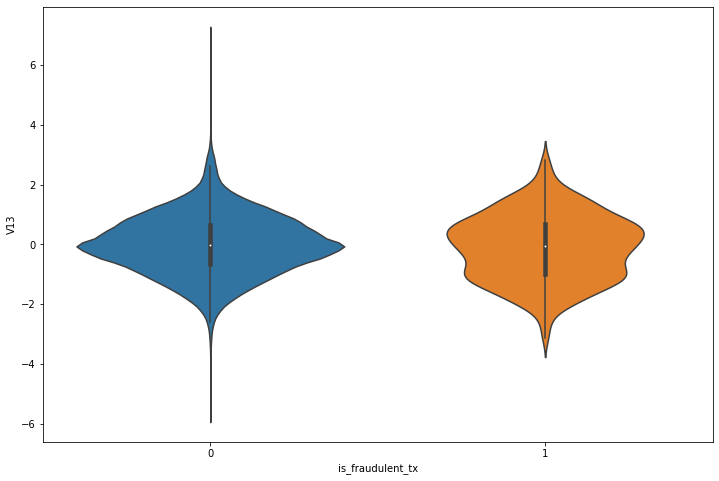

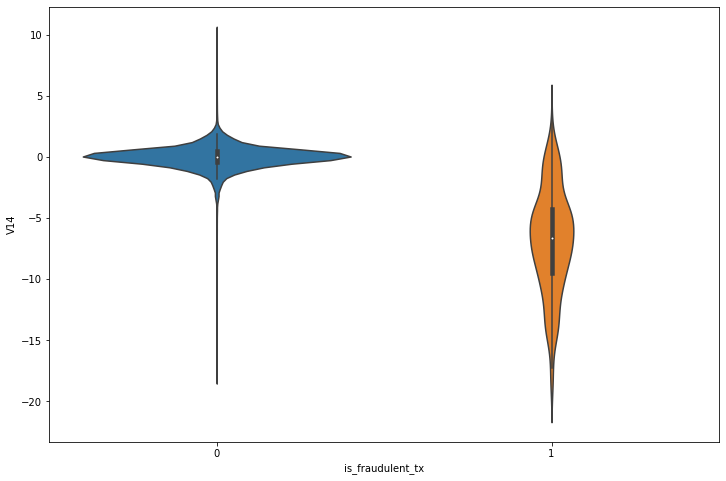

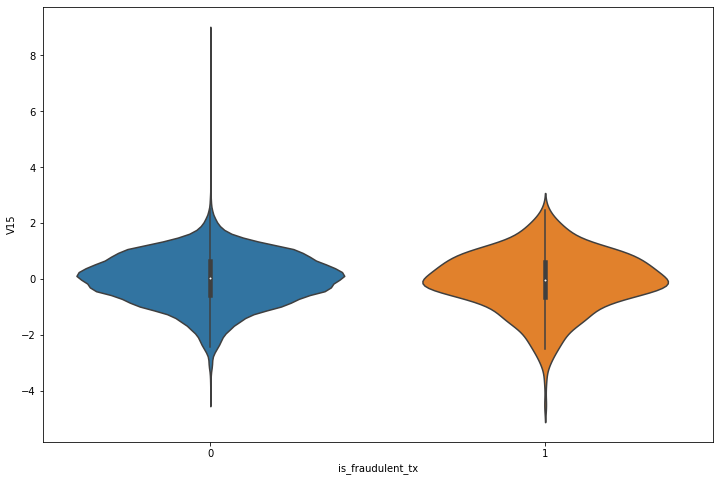

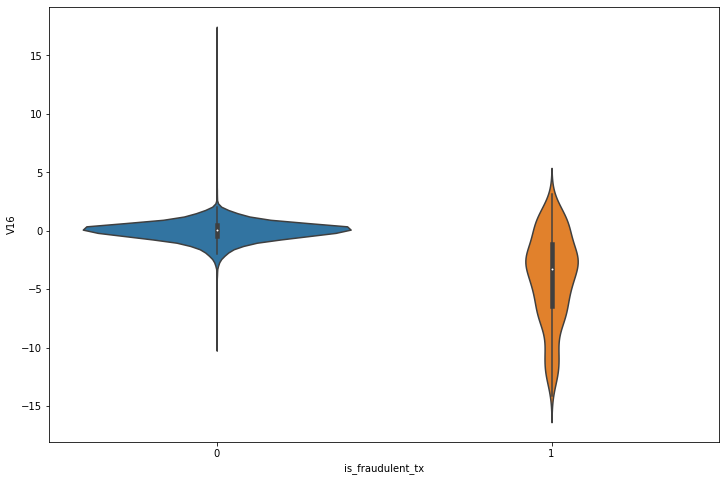

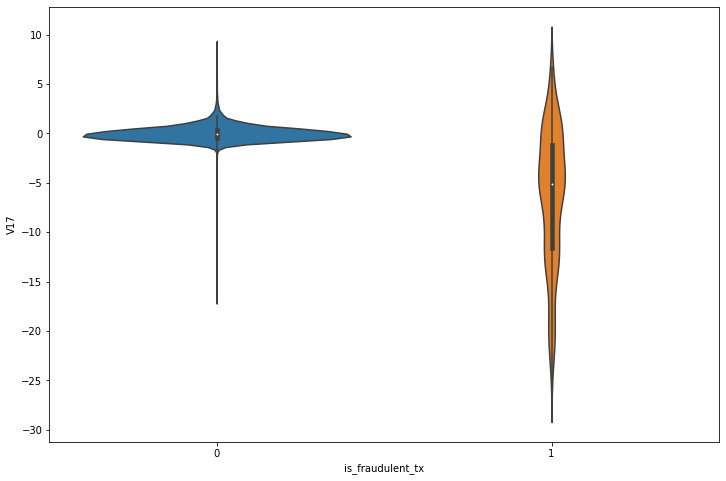

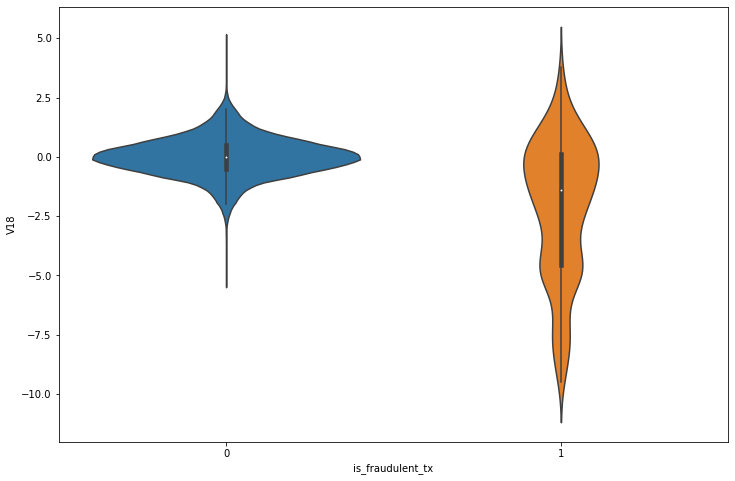

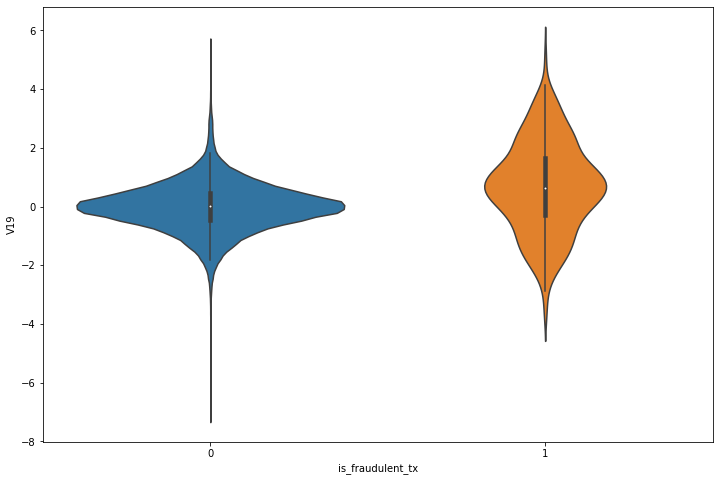

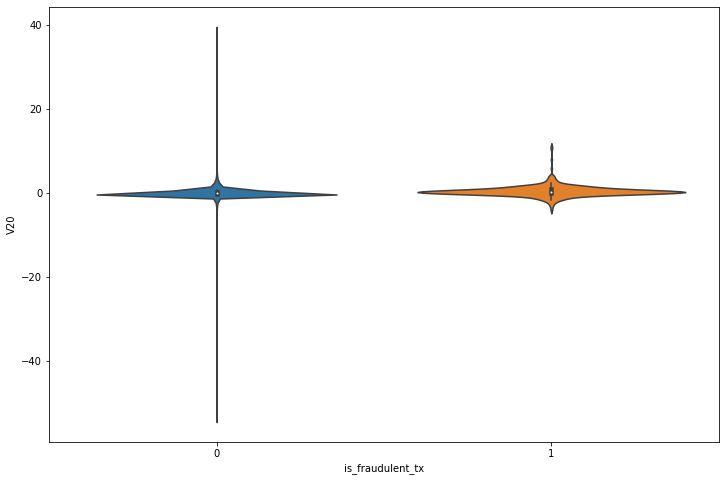

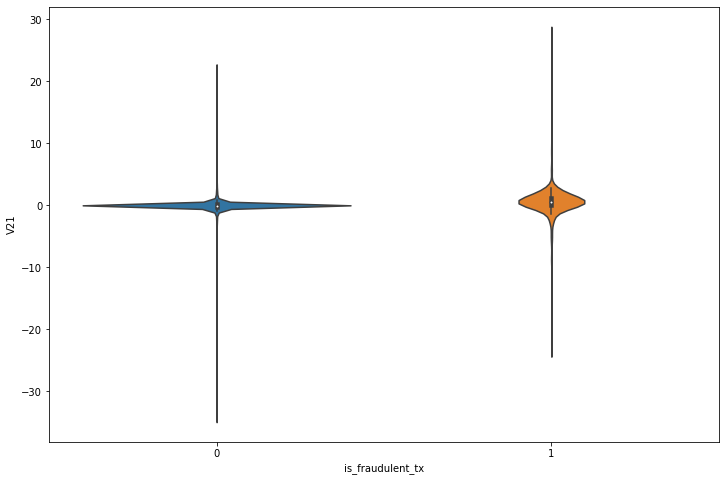

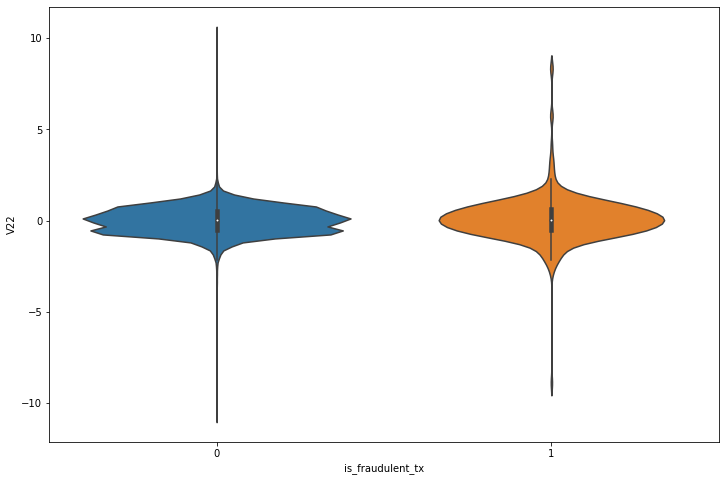

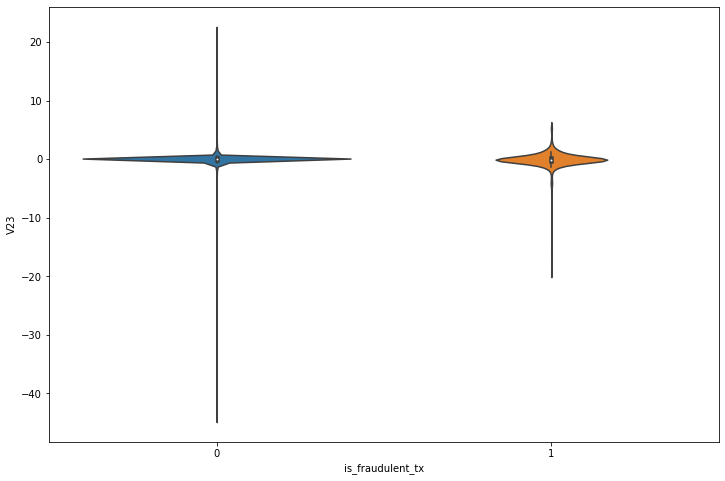

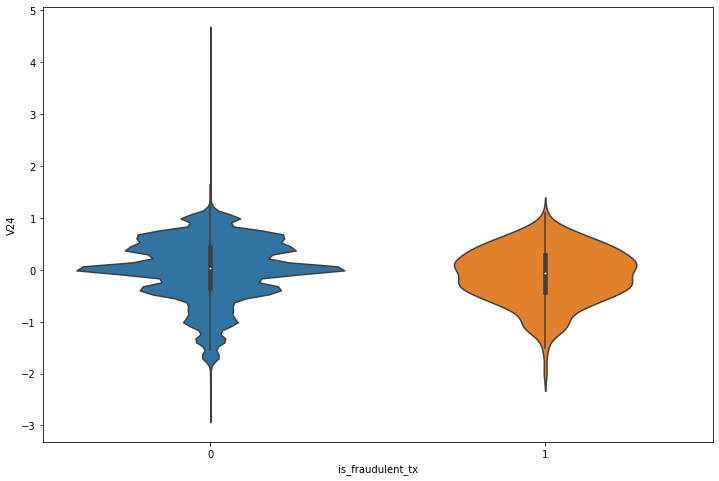

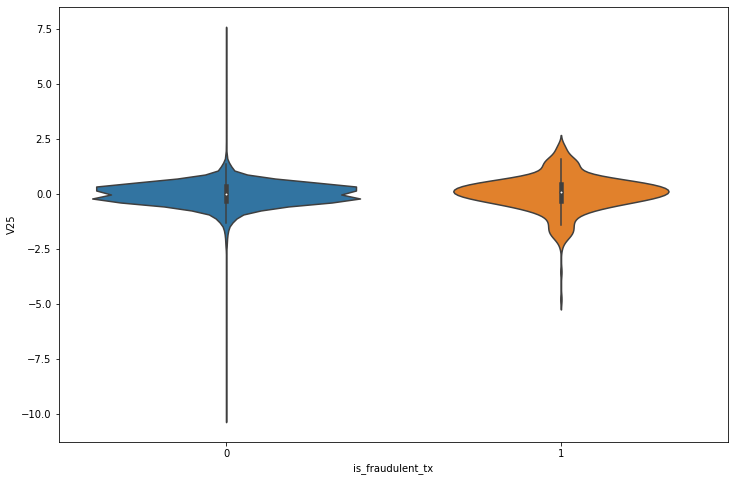

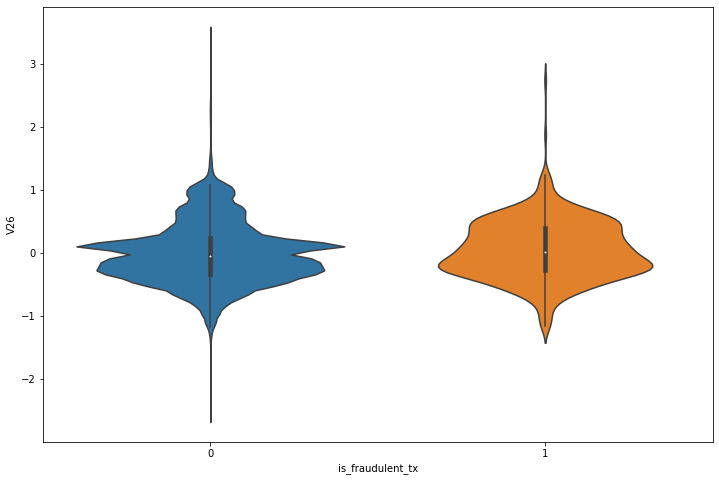

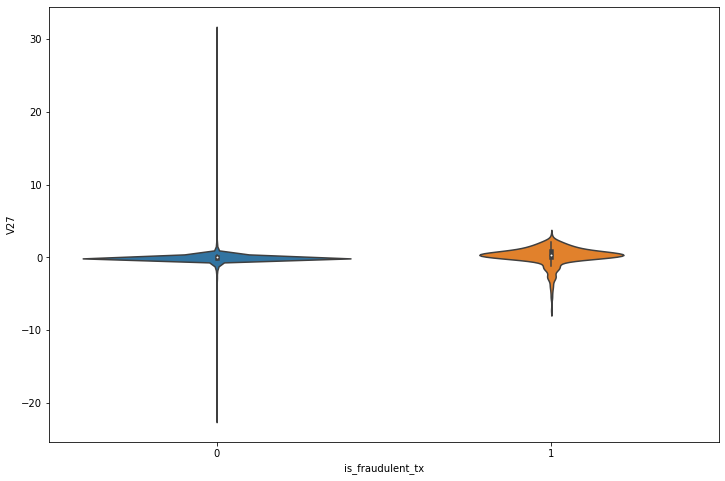

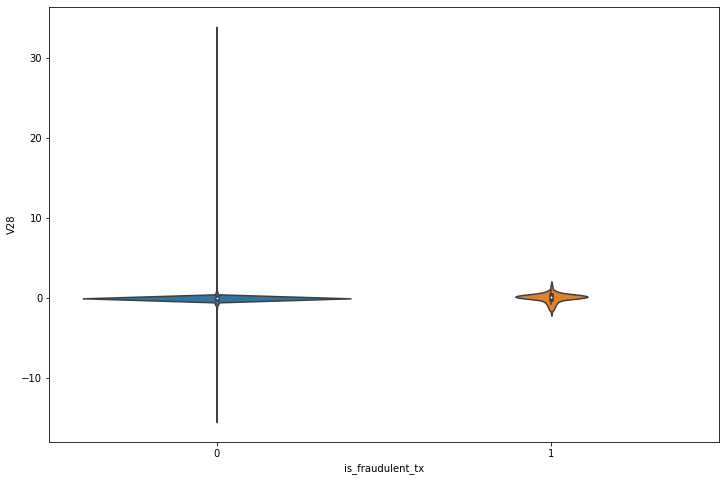

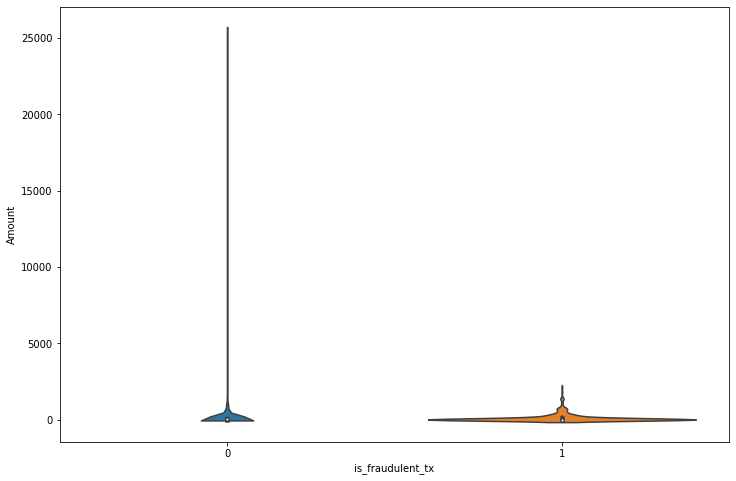

In [15]:
for column in df.columns:
    if column != "is_fraudulent_tx" :
        plt.figure(figsize=(12,8))
        ax = sns.violinplot(x="is_fraudulent_tx", y=column, data=df)
        plt.show()

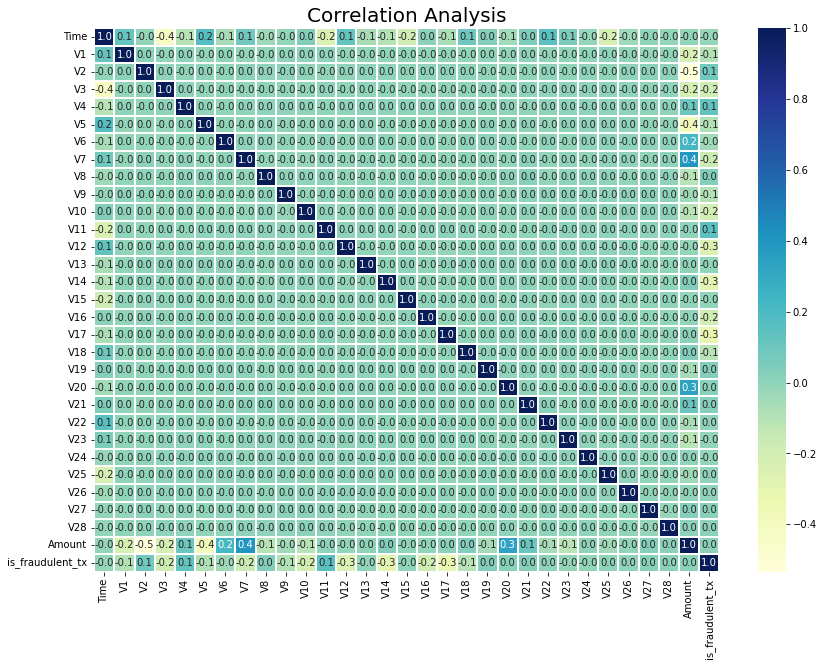

In [16]:
plt.figure(figsize = (14,10))
plt.title('Correlation Analysis', size = 20)
corr = df.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="YlGnBu",fmt='.1f',annot=True)
plt.show()

In [21]:
# Defining x and y
x=df.drop(columns=["is_fraudulent_tx"])
y=df["is_fraudulent_tx"]

#Standardization
scaler = StandardScaler()
x = scaler.fit_transform(x)

# Train-Test split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

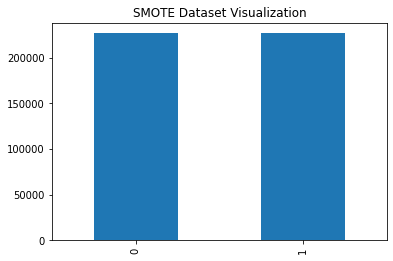

In [22]:
# SMOTE
X_train_SMOTE, y_train_SMOTE = SMOTE().fit_resample(X_train, y_train)
#SMOTE plot
pd.Series(y_train_SMOTE).value_counts().plot(kind="bar")
plt.title("SMOTE Dataset Visualization")
plt.show()

In [23]:
# DNN
model = Sequential([
Dense(input_dim = 30, units = 128, activation = "relu"),
Dense(units= 64, activation = "relu"),
Dropout(0.2),
Dense(units= 32, activation = "relu"),
Dropout(0.2),
Dense(units= 32, activation = "relu"),
Dropout(0.2),
Dense(units= 16, activation = "relu"),
Dropout(0.2),
Dense(units=1, activation = "sigmoid")])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               3968      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 32)                1056      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0

In [24]:
# Metrics
model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["Accuracy","Precision","Recall"])
model.fit(X_train_SMOTE, y_train_SMOTE, batch_size = 32, epochs = 10)
print("Evaluate on test data")
score = model.evaluate(X_test, y_test)
print("test loss, test accuracy, test precision, test recall:", score)

Epoch 1/10
14163/14163 [==============================] - 45s 3ms/step - loss: 0.0209 - Accuracy: 0.9938 - precision: 0.9921 - recall: 0.9955
Epoch 2/10
14163/14163 [==============================] - 43s 3ms/step - loss: 0.0069 - Accuracy: 0.9986 - precision: 0.9981 - recall: 0.9991
Epoch 3/10
14163/14163 [==============================] - 44s 3ms/step - loss: 0.0052 - Accuracy: 0.9990 - precision: 0.9987 - recall: 0.9993
Epoch 4/10
14163/14163 [==============================] - 45s 3ms/step - loss: 0.0046 - Accuracy: 0.9992 - precision: 0.9989 - recall: 0.9995
Epoch 5/10
14163/14163 [==============================] - 44s 3ms/step - loss: 0.0039 - Accuracy: 0.9992 - precision: 0.9989 - recall: 0.9996
Epoch 6/10
14163/14163 [==============================] - 46s 3ms/step - loss: 0.0037 - Accuracy: 0.9994 - precision: 0.9991 - recall: 0.9996
Epoch 7/10
14163/14163 [==============================] - 45s 3ms/step - loss: 0.0035 - Accuracy: 0.9994 - precision: 0.9991 - recall: 0.9997
Epoch 

In [25]:
import pickle 
# Saving model to disk
pickle.dump(model, open('model_credit.pkl','wb'))

INFO:tensorflow:Assets written to: ram://84ea7ddb-a9a0-4c38-8416-86390a95387c/assets


In [26]:
import streamlit as st
import pickle as pkl